<a href="https://colab.research.google.com/github/CRDK1009/Exploring-Planets/blob/main/Exo_planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Our first glimpse at planets outside of the solar system we call home came in 1992 when several terrestrial-mass planets were detected orbiting the pulsar PSR B1257+12. In this dataset, you can become a space explorer too by analyzing the characteristics of all discovered exoplanets (plus some familiar faces like Mars, Saturn, and even Earth). Data fields include planet and host star attributes, discovery methods, and (of course) date of discovery.

#Data was originally collected and continues to be updated by Hanno Rein at the Open Exoplanet Catalogue Github repository. If you discover any new exoplanets, please submit a pull request there.

#Constants
Jupiter mass: 1.8991766e+27 kg

Solar mass: 1.9891e+30 kg

Jupiter radius: 69911000 m

Solar radius: 6.96e+08 m

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#READ THE DATA


##PlanetIdentifier: Primary identifier of planet

##TypeFlag: [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)]

##ListsPlanetIsOn: A list of lists the planet is on including "Confirmed planets", "Controversial", "Kepler Objects of Interest", etc.

##Remaining field names are auto-descriptive and include units of measurement where available. Additional column descriptions can be found here.

https://github.com/OpenExoplanetCatalogue/oec_tables/#column-description

In [ ]:
df=pd.read_csv('oec.csv')
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [ ]:
df.shape

(3584, 24)

In [ ]:
df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

#VALUE COUNTS OF EACH TARGET CONSTANT


In [ ]:
df['ListsPlanetIsOn'].value_counts()

Confirmed planets                                                                     3295
Confirmed planets, Planets in binary systems, S-type                                   135
Controversial                                                                           72
Confirmed planets, Planets in binary systems, P-type                                    21
Controversial, Planets in binary systems, S-type                                        20
Confirmed planets, Planets in open clusters                                             13
Solar System                                                                             9
Controversial, Planets in binary systems, P-type                                         7
Retracted planet candidate                                                               4
Kepler Objects of Interest                                                               4
Confirmed planets, Orphan planets                                                        2

#REPLACE CATEGORICAL VALUES WITH NUMERICAL VALUES


In [ ]:
cleanup_nums = {"ListsPlanetIsOn": {"Confirmed planets": 1, "Confirmed planets, Planets in binary systems, S-type": 2, "Controversial": 3, "Confirmed planets, Planets in binary systems, P-type": 4,
                                  "Controversial, Planets in binary systems, S-type": 5, "Confirmed planets, Planets in open clusters": 6, "Solar System":7,
                                  'Controversial, Planets in binary systems, P-type':8,'Kepler Objects of Interest':9,'Retracted planet candidate':10,'Confirmed planets, Orphan planets':11,
                                  'Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters':12,'Planets in binary systems, S-type, Confirmed planets':13 }}

In [ ]:
df.replace(cleanup_nums, inplace=True)
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,1
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,1
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,3
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,3
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,3


#SPLIT THE DATA ACCORDING TO THE TARGET DATA

In [ ]:
df_1=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 1)]) 
df_2=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 2)]) 
df_3=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 3)]) 
df_4=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 4)]) 
df_5=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 5)])
df_6=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 6)]) 
df_7=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 7)]) 
df_8=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 8)]) 
df_9=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 9)]) 
df_10=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 10)])
df_11=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 11)]) 
df_12=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 12)]) 
df_13=pd.DataFrame(df[(df['ListsPlanetIsOn'] == 13)]) 

In [ ]:
df['Declination'].value_counts()

-60 30 42       9
-34 59 23       8
+49 18 19       7
+38 20 37       7
-05 02 36.44    7
               ..
+18 46 12       1
-56 02 24       1
+42 44 35       1
+35 39 42       1
+45 02 04       1
Name: Declination, Length: 2592, dtype: int64

In [ ]:
df_1.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2208
RadiusJpt                630
PeriodDays                75
SemiMajorAxisAU         2142
Eccentricity            2401
PeriastronDeg           3058
LongitudeDeg            3276
AscendingNodeDeg        3272
InclinationDeg          2730
SurfaceTempK            2632
DiscoveryMethod           53
DiscoveryYear              0
LastUpdated                0
RightAscension             1
Declination                1
DistFromSunParsec       1407
HostStarMassSlrMass      134
HostStarRadiusSlrRad     244
HostStarMetallicity      989
HostStarTempK             59
HostStarAgeGyr          2879
ListsPlanetIsOn            0
dtype: int64

In [ ]:
df.dtypes

PlanetIdentifier         object
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
DiscoveryMethod          object
DiscoveryYear           float64
LastUpdated              object
RightAscension           object
Declination              object
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
HostStarAgeGyr          float64
ListsPlanetIsOn           int64
dtype: object

#FILL ALL MISSING VALUES

In [ ]:
df_1=df_1.fillna(df_1.mean())
df_2=df_2.fillna(df_2.mean())
df_3=df_3.fillna(df_3.mean())
df_4=df_4.fillna(df_4.mean())
df_5=df_5.fillna(df_5.mean())
df_6=df_6.fillna(df_6.mean())
df_7=df_7.fillna(df_7.mean())
df_8=df_8.fillna(df_8.mean())
df_9=df_9.fillna(df_9.mean())
df_10=df_10.fillna(df_10.mean())
df_12=df_12.fillna(df_12.mean())
df_13=df_13.fillna(df_13.mean())

In [ ]:
df_5.isnull().sum()

PlanetIdentifier        0
TypeFlag                0
PlanetaryMassJpt        0
RadiusJpt               0
PeriodDays              0
SemiMajorAxisAU         0
Eccentricity            0
PeriastronDeg           0
LongitudeDeg            0
AscendingNodeDeg        0
InclinationDeg          0
SurfaceTempK            0
DiscoveryMethod         0
DiscoveryYear           0
LastUpdated             1
RightAscension          0
Declination             0
DistFromSunParsec       0
HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarMetallicity     0
HostStarTempK           0
HostStarAgeGyr          0
ListsPlanetIsOn         0
dtype: int64

#VALUES TAKEN FOR ANALYSIS (LISTS OF PLANETS)


##I have chosen these values as my target constant because they had previous values to fill for their missing values while the others did not therefore I chose 1,2,3,5.

In [ ]:
1,2,3,5

(1, 2, 3, 5)

In [ ]:
df_1.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.045,0.360402,39.845800,0.2196,0.037000,270.600000,113.476092,80.80613,83.84673,843.945249,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,4.634975,1
1,HD 143761 c,0,0.079,0.360402,102.540000,0.4123,0.050000,190.000000,113.476092,80.80613,83.84673,843.945249,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,4.634975,1
5,Kepler-9 b,0,0.250,0.840000,19.224180,0.1430,0.062600,153.940443,113.476092,80.80613,87.10000,707.200000,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.020,0.12,5777.0,4.634975,1
6,Kepler-9 c,0,0.170,0.820000,39.031060,0.2290,0.068400,153.940443,113.476092,80.80613,87.20000,557.900000,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.020,0.12,5777.0,4.634975,1
7,Kepler-9 d,0,0.022,0.147000,1.592851,0.0271,0.160493,153.940443,113.476092,80.80613,83.84673,1601.500000,transit,2010.0,14/03/10,19 02 17,+38 24 03,650.000,1.070,1.020,0.12,5777.0,4.634975,1


In [ ]:
a=df_1['RightAscension'].mode()
b=df_1['Declination'].mode()
c=df_1['DiscoveryMethod'].mode()

In [ ]:
a,b,c

(0    01 37 54
 1    18 57 44
 2    19 19 26
 dtype: object, 0    +38 20 37
 1    +49 18 19
 2    -60 30 42
 dtype: object, 0    transit
 dtype: object)

In [ ]:
d=df_2['RightAscension'].mode()
e=df_2['Declination'].mode()
f=df_2['DiscoveryMethod'].mode()

In [ ]:
d,e,f

(0    08 52 35.81093
 1    19 19 00.54910
 dtype: object, 0    +28 19 50.9511
 1    +41 38 04.5682
 dtype: object, 0    RV
 dtype: object)

In [ ]:
g=df_3['RightAscension'].mode()
h=df_3['Declination'].mode()
i=df_3['DiscoveryMethod'].mode()

In [ ]:
g,h,i

(0    01 44 04
 dtype: object, 0    -15 56 15
 dtype: object, 0    RV
 dtype: object)

In [ ]:
j=df_5['RightAscension'].mode()
k=df_5['Declination'].mode()
l=df_5['DiscoveryMethod'].mode()

In [ ]:
j,k,l

(0    17 18 57
 dtype: object, 0    -34 59 23
 dtype: object, 0    RV
 dtype: object)

In [ ]:
df_1['RightAscension']=df_1['RightAscension'].fillna('01 37 54')
df_1['Declination']=df_1['Declination'].fillna('+38 20 37')
df_1['DiscoveryMethod']=df_1['DiscoveryMethod'].fillna('transit')
df_2['RightAscension']=df_2['RightAscension'].fillna('08 52 35.81093')
df_2['Declination']=df_2['Declination'].fillna('+28 19 50.9511')
df_2['DiscoveryMethod']=df_2['DiscoveryMethod'].fillna('RV')
df_3['RightAscension']=df_3['RightAscension'].fillna('01 44 04')
df_3['Declination']=df_3['Declination'].fillna('-15 56 15')
df_3['DiscoveryMethod']=df_3['DiscoveryMethod'].fillna('RV')
df_5['RightAscension']=df_5['RightAscension'].fillna('17 18 57')
df_5['Declination']=df_5['Declination'].fillna('-34 59 23')
df_5['DiscoveryMethod']=df_5['DiscoveryMethod'].fillna('RV')

In [ ]:
df_1.isnull().sum()

PlanetIdentifier        0
TypeFlag                0
PlanetaryMassJpt        0
RadiusJpt               0
PeriodDays              0
SemiMajorAxisAU         0
Eccentricity            0
PeriastronDeg           0
LongitudeDeg            0
AscendingNodeDeg        0
InclinationDeg          0
SurfaceTempK            0
DiscoveryMethod         0
DiscoveryYear           0
LastUpdated             0
RightAscension          0
Declination             0
DistFromSunParsec       0
HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarMetallicity     0
HostStarTempK           0
HostStarAgeGyr          0
ListsPlanetIsOn         0
dtype: int64

#JOINING THE DATA

In [ ]:
DF=df_1.append(df_2)

In [ ]:
Df_1=DF.append(df_3)

In [ ]:
df_final=Df_1.append(df_5)

In [ ]:
df_final.shape

(3522, 24)

In [ ]:
df_final.isnull().sum()

PlanetIdentifier        0
TypeFlag                0
PlanetaryMassJpt        0
RadiusJpt               0
PeriodDays              0
SemiMajorAxisAU         0
Eccentricity            0
PeriastronDeg           0
LongitudeDeg            0
AscendingNodeDeg        0
InclinationDeg          0
SurfaceTempK            0
DiscoveryMethod         0
DiscoveryYear           0
LastUpdated             8
RightAscension          0
Declination             0
DistFromSunParsec       0
HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarMetallicity     0
HostStarTempK           0
HostStarAgeGyr          0
ListsPlanetIsOn         0
dtype: int64

In [ ]:
df_final=df_final.drop(['LastUpdated','DiscoveryYear'],axis=1)

In [ ]:
df_final.dtypes

PlanetIdentifier         object
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
DiscoveryMethod          object
RightAscension           object
Declination              object
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
HostStarAgeGyr          float64
ListsPlanetIsOn           int64
dtype: object

#ENCODING OBJECT VARIABLES

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final['PlanetIdentifier']=le.fit_transform(df_final['PlanetIdentifier'])
df_final['DiscoveryMethod']=le.fit_transform(df_final['DiscoveryMethod'])
df_final['RightAscension']=le.fit_transform(df_final['RightAscension'])
df_final['Declination']=le.fit_transform(df_final['Declination'])

In [ ]:
df_final.dtypes

PlanetIdentifier          int64
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
DiscoveryMethod           int64
RightAscension            int64
Declination               int64
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
HostStarAgeGyr          float64
ListsPlanetIsOn           int64
dtype: object

In [ ]:
X=df_final.drop('ListsPlanetIsOn',axis=1)
y=df_final['ListsPlanetIsOn']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

#COMPENSIATE FOR THE IMBALANCE PRESENT IN THE DATA

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()

#XGB HYPERPARAMETERS

In [ ]:
gbm_param_grid = {
    'colsample_bytree': range(0, 1),
    'n_estimators': range(50,100),
    'max_depth': range(1, 10)
}
    


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#RANDOM FOREST HYPERPARAMETERS

In [ ]:
random_grid = {'n_estimators': range(100,2000),
               'max_depth': range(1,100),
               'min_samples_split': range(1,10),
               'min_samples_leaf': range(1,10)}

#RANDOM SEARCH for XGB

In [ ]:
randomized_mse = RandomizedSearchCV(estimator=model,param_distributions=gbm_param_grid,n_iter=50, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [ ]:
randomized_mse.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.5s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth={'scale_pos_weight': [1,
                                                                           10,
                                                                           25,
                                                                           50,
                                                                           75,
                                                                           99,
                                                                           100,
                                                 

In [ ]:
randomized_mse.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=94, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
randomized_mse.best_score_

0.9391964285714286

#VISUALISING HYPERPARAMETERS (XGB)


In [ ]:
xgb_df=pd.DataFrame(randomized_mse.cv_results_)

In [ ]:
xgb_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_max_depth', 'param_colsample_bytree',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

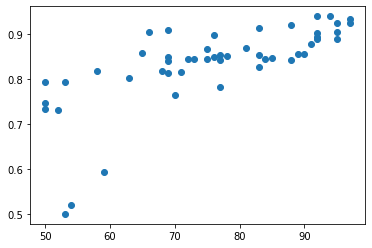

In [ ]:
 plt.scatter('param_n_estimators', 'mean_test_score',data=xgb_df)

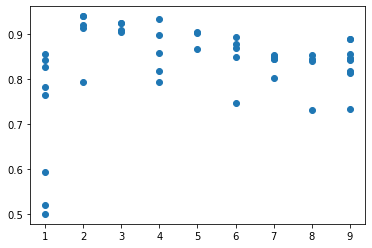

In [ ]:
plt.scatter('param_max_depth', 'mean_test_score',data=xgb_df)

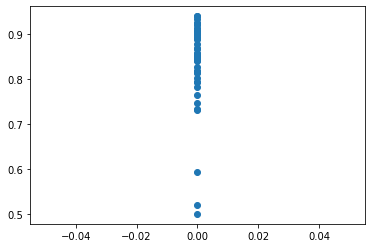

In [ ]:
plt.scatter('param_colsample_bytree', 'mean_test_score',data=xgb_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
randomized_mse_rf = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=50, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [ ]:
randomized_mse_rf.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
randomized_mse_rf.best_score_

1.0

#VISUALISING RANDOM FOREST HYPERPARAMETERS

In [ ]:
rf_df=pd.DataFrame(randomized_mse_rf.cv_results_)

In [ ]:
rf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

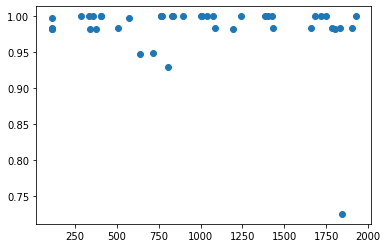

In [ ]:
plt.scatter('param_n_estimators', 'mean_test_score',data=rf_df)

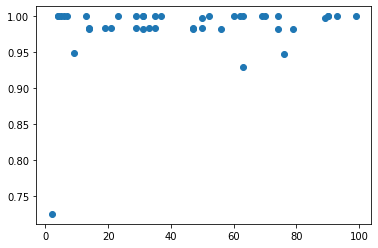

In [ ]:
plt.scatter('param_max_depth', 'mean_test_score',data=rf_df)

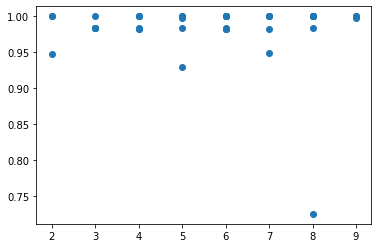

In [ ]:
plt.scatter('param_min_samples_split', 'mean_test_score',data=rf_df)

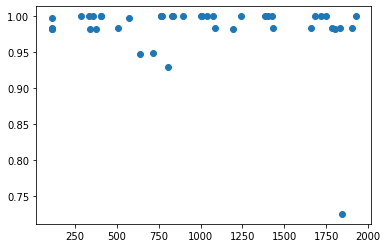

In [ ]:
plt.scatter('param_n_estimators', 'mean_test_score',data=rf_df)

#Rectified Parameters taken for Grid Search(XGB)

#Taken from Visualising the hyperparameters from the Random Search of XGB

In [ ]:
gbm_param_grid_final = {
    'n_estimators': range(90,125),
    'max_depth': range(1,5)
}

#GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Grid_mse = GridSearchCV(estimator=model,param_grid=gbm_param_grid_final, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [ ]:
Grid_mse.fit(X_train,y_train)

Fitting 4 folds for each of 140 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  3.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth={'scale_pos_weight': [1, 10, 25,
                                                                     50, 75, 99,
                                                                     100,
                                                                     1000]},
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None,

In [ ]:
Grid_mse.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Grid_mse.best_score_

0.9799107142857143

#STACKING CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
lr=LogisticRegression()

In [ ]:
clf_stack=StackingClassifier(classifiers=[randomized_mse_rf.best_estimator_,Grid_mse.best_estimator_],meta_classifier=lr,use_features_in_secondary=False)
clf_stack.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=69,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=7,
                                                       min_samples_split=8,
                                                       min_weigh

#OVERFITTING CHECK

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))  

Accuracy: 1.0000


In [ ]:
print("Accuracy: {:0.4f}".format(accuracy_score(y_train, clf_stack.predict(X_train))))

Accuracy: 1.0000


#SAVING THE MODEL

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf_stack, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

1.0
